# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [2]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = 0, names = columns))


In [3]:
fires_dt

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Get X and Y

Create the features data frame and target data.

In [4]:
x = fires_dt.drop('area', axis=1)
y = fires_dt['area']
x = pd.get_dummies(x, columns=['month', 'day'], drop_first=True)
x.head()

,coord_x,coord_y,ffmc,dmc,dc,isi,temp,rh,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,False,False,False,False,False,False,False,False,False,False
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,False,False,True,False,False,False,False,False,True,False
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,False,False,True,False,False,True,False,False,False,False
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,False,False,False,False,False,False,False,False,False,False
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,False,False,False,False,False,False,True,False,False,False


In [5]:
from sklearn.model_selection import train_test_split

# Сreate a dataframe `X` that holds the features
X = fires_dt.drop(columns='area', axis=1)

# Create a dataframe `Y` that holds the target data
Y = fires_dt['area']

# Obtain the training and testing data sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Display the shapes of the resulting data sets to confirm
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (361, 12)
X_test shape: (156, 12)
Y_train shape: (361,)
Y_test shape: (156,)


In [6]:
# numeric_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
# categorical_features = ['month', 'day']

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preproc1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
preproc1

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
       'rain'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['month', 'day'], dtype='object'))])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [8]:
from sklearn.preprocessing import PowerTransformer

preproc2 = ColumnTransformer(
    transformers=[
        ('num', PowerTransformer(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
preproc2

ColumnTransformer(transformers=[('num', PowerTransformer(),
                                 Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
       'rain'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['month', 'day'], dtype='object'))])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Baseline regressors
baseline_model = LinearRegression()

# Advanced regressors
advanced_model = RandomForestRegressor(random_state=42)

In [10]:
# Pipeline A = preproc1 + baseline
pipeline_a = Pipeline(steps=[
    ('preprocessing', preproc1),
    ('regressor', baseline_model)
])

In [11]:
# Pipeline B = preproc2 + baseline
pipeline_b = Pipeline(steps=[
    ('preprocessing', preproc2),
    ('regressor', baseline_model)
])

In [12]:
# Pipeline C = preproc1 + advanced model
pipeline_c = Pipeline(steps=[
    ('preprocessing', preproc1),
    ('regressor', advanced_model)
])

In [13]:
# Pipeline D = preproc2 + advanced model
pipeline_d = Pipeline(steps=[
    ('preprocessing', preproc2),
    ('regressor', advanced_model)
])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [14]:
# Adjusted parameter grid for Pipeline A (Linear Regression)
param_grid_a = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [False, True],
    'regressor__copy_X': [True, False],
    'regressor__n_jobs': [-1, 1, 2, 4]
}

# Perform GridSearchCV for Pipeline A
grid_search_a = GridSearchCV(pipeline_a, param_grid_a, cv=5, scoring='neg_mean_squared_error')
grid_search_a.fit(X_train, Y_train)

# Print best parameters and best score
print(f"Best parameters for Pipeline A (Linear Regression): {grid_search_a.best_params_}")
print(f"Best score (negative MSE) for Pipeline A: {grid_search_a.best_score_}")


Best parameters for Pipeline A (Linear Regression): {'regressor__copy_X': True, 'regressor__fit_intercept': False, 'regressor__n_jobs': -1, 'regressor__positive': True}
Best score (negative MSE) for Pipeline A: -2450.080969543677


In [15]:
# Define the parameter grid for Linear Regression without normalize
param_grid_b = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [False, True],
    'regressor__copy_X': [True, False],
    'regressor__n_jobs': [-1, 1, 2, 4]
}

# Perform GridSearchCV for Pipeline B
grid_search_b = GridSearchCV(pipeline_b, param_grid_b, cv=5, scoring='neg_mean_squared_error')
grid_search_b.fit(X_train, Y_train)

# Print best parameters and best score
print(f"Best parameters for Pipeline B (Linear Regression): {grid_search_b.best_params_}")
print(f"Best score (negative MSE) for Pipeline B: {grid_search_b.best_score_}")

Best parameters for Pipeline B (Linear Regression): {'regressor__copy_X': True, 'regressor__fit_intercept': False, 'regressor__n_jobs': -1, 'regressor__positive': True}
Best score (negative MSE) for Pipeline B: -2446.7252338386475


In [17]:
# Define the parameter grid for Random Forest
param_grid_c = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for Pipeline C
grid_search_c = GridSearchCV(pipeline_c, param_grid_c, cv=5, scoring='neg_mean_squared_error')
grid_search_c.fit(X_train, Y_train)

# Print best parameters and best score
print(f"Best parameters for Pipeline C (Linear Regression): {grid_search_c.best_params_}")
print(f"Best score (negative MSE) for Pipeline C: {grid_search_c.best_score_}")

Best parameters for Pipeline C (Linear Regression): {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}
Best score (negative MSE) for Pipeline C: -2534.0553841538476


In [18]:
# Define the parameter grid for Random Forest
param_grid_d = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for Pipeline D
grid_search_d = GridSearchCV(pipeline_d, param_grid_d, cv=5, scoring='neg_mean_squared_error')
grid_search_d.fit(X_train, Y_train)

# Print best parameters and best score
print(f"Best parameters for Pipeline D (Linear Regression): {grid_search_d.best_params_}")
print(f"Best score (negative MSE) for Pipeline D: {grid_search_d.best_score_}")

Best parameters for Pipeline D (Linear Regression): {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}
Best score (negative MSE) for Pipeline D: -2527.115505868581


# Evaluate

+ Which model has the best performance?

In [19]:
# Compare the best scores from each pipeline
best_scores = {
    'Pipeline A (Linear Regression)': grid_search_a.best_score_,
    'Pipeline B (Linear Regression)': grid_search_b.best_score_,
    'Pipeline C (Random Forest)': grid_search_c.best_score_,
    'Pipeline D (Random Forest)': grid_search_d.best_score_
}

# Identify the best-performing pipeline
best_pipeline = max(best_scores, key=best_scores.get)
best_score = best_scores[best_pipeline]

print(f"Best performing pipeline: {best_pipeline}")
print(f"Best score (negative MSE): {best_score}")

Best performing pipeline: Pipeline B (Linear Regression)
Best score (negative MSE): -2446.7252338386475


The best performing pipeline is Pipeline B, which used a Linear Regression model with preproc2. It achieved the lowest negative MSE, indicating it was the most effective in predicting the area affected by forest fires given the features.

# Export

+ Save the best performing model to a pickle file.

In [20]:
import joblib

# Save the best model
if best_pipeline == 'Pipeline A (Linear Regression)':
    best_model = grid_search_a.best_estimator_
elif best_pipeline == 'Pipeline B (Linear Regression)':
    best_model = grid_search_b.best_estimator_
elif best_pipeline == 'Pipeline C (Random Forest)':
    best_model = grid_search_c.best_estimator_
elif best_pipeline == 'Pipeline D (Random Forest)':
    best_model = grid_search_d.best_estimator_

joblib.dump(best_model, 'best_model_forest_fire.pkl')
print("Best model saved as best_model_forest_fire.pkl")

Best model saved as best_model_forest_fire.pkl


# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

Pipeline is not fitted. Fitting now...


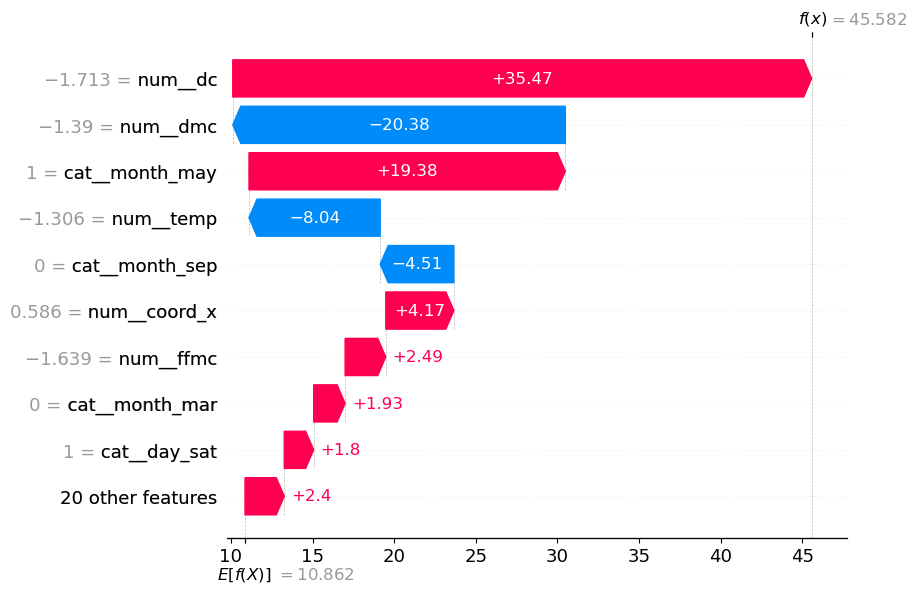

In [23]:
import shap
import pandas as pd
from sklearn.exceptions import NotFittedError

# Assuming `X_train` and `y_train` are your training data and target variables
# Ensure pipeline is fitted
try:
    pipeline_b['preprocessing'].transform(X_test)
except NotFittedError:
    print("Pipeline is not fitted. Fitting now...")
    pipeline_b.fit(X_train, Y_train)

# Transform the data
data_transform = pipeline_b['preprocessing'].transform(X_test)

# Retrieve feature names
feature_names = pipeline_b['preprocessing'].get_feature_names_out()

# Create SHAP explainer
explainer = shap.Explainer(pipeline_b['regressor'], data_transform)

# Compute SHAP values
shap_values = explainer(data_transform)

# Select a specific instance for local explanation
instance_index = 0  # Use the first instance

# Create SHAP values with feature names
shap_values_instance = shap_values[instance_index]
shap_values_instance_with_names = shap.Explanation(
    values=shap_values_instance.values,
    base_values=shap_values_instance.base_values,
    data=data_transform[instance_index],
    feature_names=feature_names
)

# Plot local explanation using waterfall plot
shap.waterfall_plot(shap_values_instance_with_names)


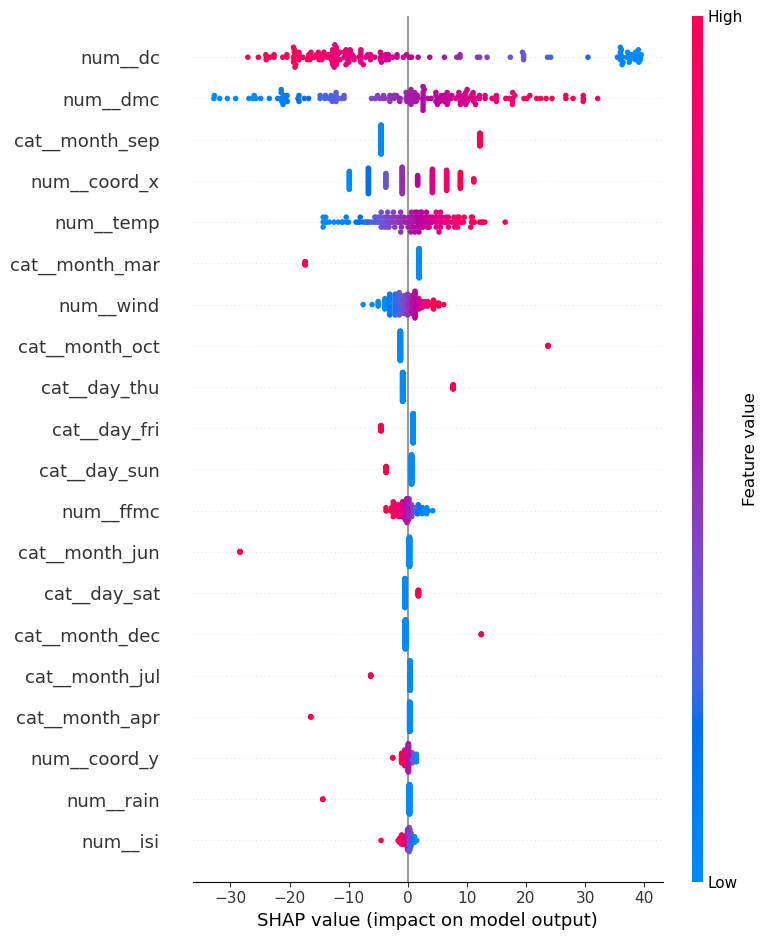

In [24]:
shap.summary_plot(shap_values, data_transform, feature_names=pipeline_b['preprocessing'].get_feature_names_out())

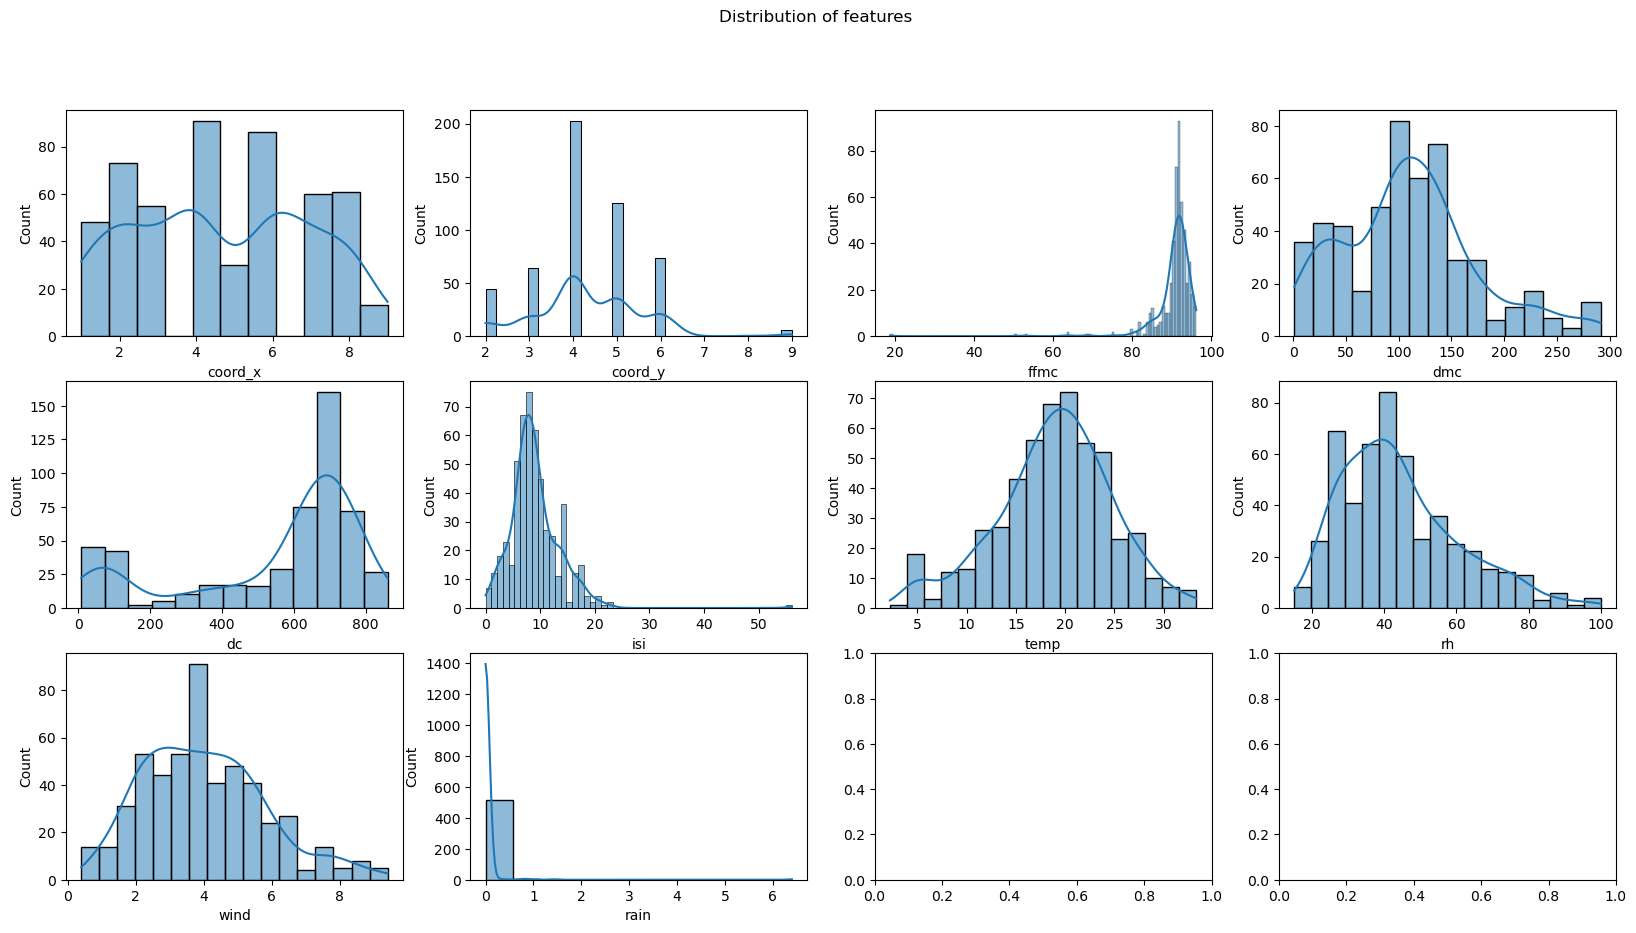

In [25]:
# Analyzing distribution of each feature to decide if we need to apply a transformation
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots (3, 4, figsize=(20, 10))
fig.suptitle( 'Distribution of features')
for i, feature in enumerate (numerical_features):
    sns.histplot(X[feature], ax=axes [i//4, i%4], kde=True)
plt.show ()

**1. Explanation of a Specific Observation**

num__dc: The feature num__dc (Drought Code) has a significant positive impact, contributing +35.47 to the prediction. This indicates that a higher drought code value is strongly associated with an increase in the predicted outcome for this particular instance.

num__dmc: The feature num__dmc (Duff Moisture Code) has a significant negative impact, contributing -20.38. A higher value for this feature is linked to a decrease in the predicted outcome for this specific observation.

cat__month_may: The categorical feature indicating the month of May is contributing positively (+19.38) to the prediction.

num__temp: The temperature (num__temp) has a negative impact, reducing the predicted value by -8.04. **This point raised a question for me.**

cat__month_sep: September as a month has a small negative impact (-4.51).

num__coord_x: The X-coordinate contributes positively (+4.17).

num__rain: Rainfall (num__rain) appears to have minimal impact on the model's predictions, as seen by the clustering of SHAP values around zero.

num__isi: The Initial Spread Index also shows little variation in SHAP values, indicating a lower importance.

**2. Features to Remove and Rationale**

Based on the SHAP summary plot, features like num__rain and num__isi appear to have minimal impact on the model’s predictions.

Features to Consider for Removal:

num__rain: Given its minimal impact, removing this feature is unlikely to significantly alter the model's performance.

num__isi: Similar to num__rain, the Initial Spread Index has low variability in SHAP values, suggesting it contributes little to the prediction power.

Testing Feature Removal:
To test whether removing these features enhances or deteriorates model performance, we can follow these steps:
- Train a New Model Without These Features: Create a new training dataset excluding the identified features and train the model.
- Compare Performance Metrics: Use performance metrics such as RMSE or MSE to compare the new model's performance against the original model.
- Cross-Validation: Perform cross-validation to ensure that the changes are consistent across different subsets of the data.
- Re-examine SHAP Values: Use SHAP values again on the new model to see if the overall importance of features has shifted or if new insights emerge.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.